## <span style="color:Blue"> Feature Selection :  Embedded Method or Intrinsic or Implicit Method
    
 - Youtube Video Explanation for Regularization Feature selection : https://youtu.be/uLBqlU9Q3F8
 - Youtube Video Explanation for Tree based Feature selection : https://youtu.be/OIkAx9OTjvA

Wrapper methods provide better results in terms of performance, but they’ll also cost us a lot of computation time/resources.so if we could include the feature selection process in ML model training itself? That could lead us to even better features for that model, in a shorter amount of time. This is where embedded methods come into play.

**Embedded methods,they perform feature selection during the model training, which is why we call them embedded methods.**

**Embedded Methods: Advantages**

The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:

- They take into consideration the interaction of features like wrapper methods do.
- They are faster like filter methods.
- They are more accurate than filter methods.
- They find the feature subset for the algorithm being trained.
- They are much less prone to overfitting.

**Feature Selection Process: Recursive Feature Elimination**

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. It then ranks the features based on the order of their elimination.

## <span style="color:green"> Feature Selection using Regularization

As model complexity increases, the bias of the model decreases and variance increases (and vice-versa). By using various regularization techniques, we can try to achieve low training and testing error so that we’re able to trade-off bias and variance perfectly.

Regularization in machine learning adds a penalty to the different parameters of a model to reduce its freedom(avoid overfitting). This penalty is applied to the coefficient that multiplies each of the features in the linear model, and is done to avoid overfitting, make the model robust to noise, and to improve its generalization.

There are three main types of regularization for linear models:
1. lasso regression or L1 regularization
2. ridge regression or L2 regularization
3. elastic nets or L1/L2 regularization

#### <span style="color:red"> Lasso Regression L1 Regularisation

Lasso is exactly same as Ridge, in the sense that it also adds penalty. But instead of the squared slope/coefficient/weight, it adds the absolute value of the slope/weight as the penalty to Sum squared Error loss function.
    
<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Lasso.png" width="240" height="100" align="left"/>       

If we take various values of penalty parameter Lambda or Alpha and try to get output with both Lasso and Ridge regression regularizations in the linear regression line eguation where we have multiple variables then you will notice that ,Lasso quickly made the coefficient of X to Zero whereas Ridge could reduce it to near zero with large values of Lambda. But Ridge was unable to make it zero even with Lambda as 100 or even 1000.
So in this way we can say that Lasso can reduce the no of unrequired features very quickly.

**A tuning parameter, λ controls the strength of the L1. λ is basically the amount of shrinkage:**

    When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
    As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
    As λ increases, bias increases.
    As λ decreases, variance increases.

If an intercept is included in the model, it is usually left unchanged. 

#### <span style="color:red"> L2 regularization

It doesn’t set the coefficient to zero, but only approaching zero—that’s why we use only L1 in feature selection.

#### <span style="color:red"> L1/L2 regularization or Elastic Nets

It is a combination of the L1 and L2. It incorporates their penalties, and therefore we can end up with features with zero as a coefficient—similar to L1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR,Lasso
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature

In [4]:
features = X.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [6]:
# Lets apply the Lasso Model -- in Linear Dataset
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [7]:
coeff = lasso.coef_
coeff

array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

In [8]:
df_coeff = pd.DataFrame({"features":features,"coeff":coeff})
df_coeff.sort_values("coeff")

,features,coeff
7,DIS,-1.105614
10,PTRATIO,-0.744015
12,LSTAT,-0.602282
0,CRIM,-0.122854
6,AGE,-0.019605
9,TAX,-0.010584
2,INDUS,-0.000497
4,NOX,-0.000000
11,B,0.012396
1,ZN,0.038639


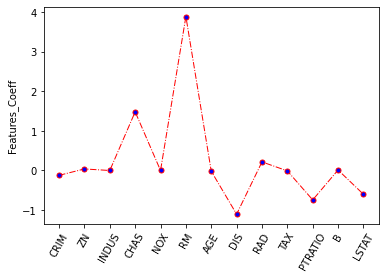

In [9]:
# Lets plot the coeff with features
plt.plot(range(len(features)),coeff, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=60)
plt.ylabel("Features_Coeff")
plt.show()

<AxesSubplot:xlabel='features', ylabel='coeff'>

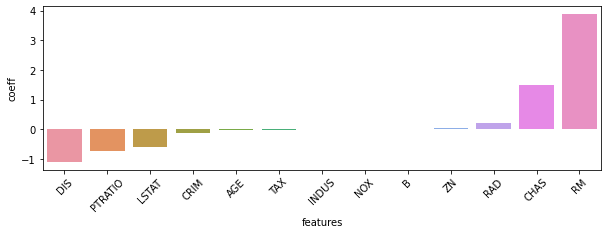

In [10]:
# Use Bar chart to show coeff
df_coeff.set_index('coeff')
# sort in ascending order to better visualization.
df_coeff = df_coeff.sort_values('coeff')
# plot the feature coeff in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="features",y= "coeff", data=df_coeff)

## <span style="color:green"> Tree-based Feature Selection


Tree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive performance but can also provide us with what we call feature importance as a way to select features.

Feature importance tells us which variables are more important in making accurate predictions on the target variable/class. In other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target.
Random forests provide us with feature importance using straightforward methods — mean decrease impurity and mean decrease accuracy.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
# Import the RFE from sklearn library
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [12]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_loan = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")

In [13]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
# Remove all null value
df_loan.dropna(inplace=True)
# drop the uninformatica column("Loan_ID")
df_loan.drop(labels=["Loan_ID"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)
#df_loan.info()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [16]:
X = df_loan.iloc[:,0:-1]
y = df_loan["Loan_Status"]

In [17]:
X.shape,y.shape

((480, 11), (480,))

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.30)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336, 11)
(144, 11)
(336,)
(144,)


In [20]:
# Without feature selection check auuracy with Random forest
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf_w)

0.8125

<AxesSubplot:xlabel='Features', ylabel='Importances'>

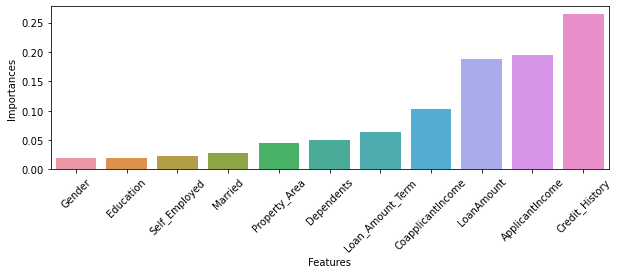

In [21]:
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [22]:
# With feature selection check auuracy with Random Forest
# The following example shows how to retrieve the 7 most informative features
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=7, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)
#Reduce X to the selected features and then predict using the predict
y_pred_rf = sel_rfe_tree.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf)

[False False  True False False  True  True  True  True  True  True]
[4 2 1 3 5 1 1 1 1 1 1]


0.8263888888888888

The features which were selected are rank 1.

In [23]:
# find the number of selected features with the help of the following script:
selected_cols = [column for column in X_train.columns if column in X_train.columns[sel_rfe_tree.get_support()]]
selected_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [24]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')